## Multi-Layer Perceptron from scratch (Implementation)
Name: Suyash Chintawar

Roll no: 191IT109

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix

## Part 1: SPECT Dataset


In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train'

--2022-08-30 04:59:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3758 (3.7K) [application/x-httpd-php]
Saving to: ‘SPECT.train’

SPECT.train         100%[===================>]   3.67K  --.-KB/s    in 0s      

2022-08-30 04:59:27 (72.5 MB/s) - ‘SPECT.train’ saved [3758/3758]



In [ ]:
features = ['F'+str(i) for i in range(1,23)]
df=pd.read_csv('SPECT.train',header=None, names=['class']+features)
df = df.reindex(columns=features +['class'])
df = df.sample(frac=1,random_state=16).reset_index(drop=True)
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,class
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def initialize(num_features,dim1,dim2,dim3,output):
  w1 = np.random.rand(num_features,dim1)
  b1 = np.random.rand(1,dim1)
  w2 = np.random.rand(dim1,dim2)
  b2 = np.random.rand(1,dim2)
  w3 = np.random.rand(dim2,dim3)
  b3 = np.random.rand(1,dim3)
  w4 = np.random.rand(dim3,output)
  b4 = np.random.rand(1,output)
  return w1,b1,w2,b2,w3,b3,w4,b4

In [ ]:
def predict(data,w1,b1,w2,b2,w3,b3,w4,b4):
  hop1 = np.matmul(data, w1) + b1
  hop2 = np.matmul(hop1, w2) + b2
  hop3 = np.matmul(hop2, w3) + b3
  hop4 = np.matmul(hop3, w4) + b4
  output = 1 / (1 + np.exp(- hop4))

  return hop1, hop2, hop3, hop4, output

In [ ]:
def train_perceptron(data,w1,b1,w2,b2,w3,b3,w4,b4,lr):
  x = data[:,:-1]
  actual = data[:,-1:]

  iterations = 200
  for i in range(iterations):
    hop1, hop2, hop3, hop4, output = predict(x,w1,b1,w2,b2,w3,b3,w4,b4)

    w1 = w1 - lr * np.clip(x.T @ (output-actual) @ w4.T @ w3.T @ w2.T,-10,10)
    b1 = b1 - lr * np.clip(np.sum((output-actual) @ w4.T @ w3.T @ w2.T, axis = 0),-10,10)
    w2 = w2 - lr * np.clip(hop1.T @ (output-actual) @ w4.T @ w3.T,-10,10)
    b2 = b2 - lr * np.clip(np.sum((output-actual) @ w4.T @ w3.T, axis = 0),-10,10)
    w3 = w3 - lr * np.clip(hop2.T @ (output-actual) @ w4.T,-10,10)
    b3 = b3 - lr * np.clip(np.sum((output-actual) @ w4.T, axis = 0),-10,10)
    w4 = w4 - lr * np.clip(hop3.T @ (output-actual),-10,10)
    b4 = b4 - lr * np.clip(np.sum((output-actual), axis = 0),-10,10)
    
  return w1,b1,w2,b2,w3,b3,w4,b4

In [ ]:
def evaluate_perceptron(data,w1,b1,w2,b2,w3,b3,w4,b4):
  x = data[:,:-1]
  y = data[:,-1:]

  _, _, _, _, y_pred3 = predict(x,w1,b1,w2,b2,w3,b3,w4,b4)
  for i in range(len(y_pred3)):
    if y_pred3[i] < 0.5:
      y_pred3[i] = 0
    else:
      y_pred3[i] = 1
  accuracy = accuracy_score(y,y_pred3)
  cm = confusion_matrix(y,y_pred3)
  sn.heatmap(cm,annot=True)
  plt.show()
  return accuracy

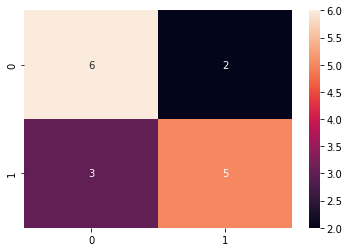

Fold 1 accuracy: 0.6875


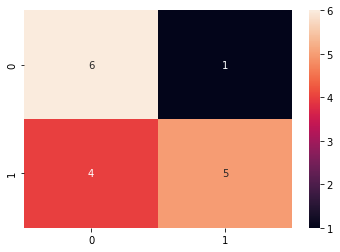

Fold 2 accuracy: 0.6875


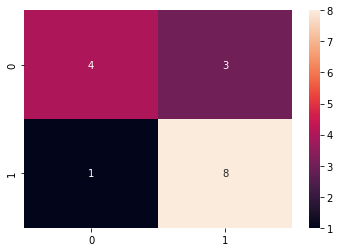

Fold 3 accuracy: 0.75


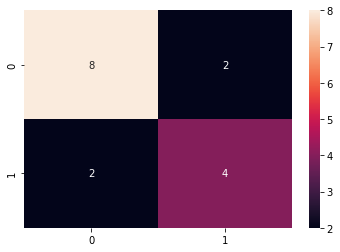

Fold 4 accuracy: 0.75


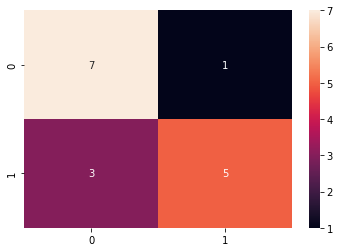

Fold 5 accuracy: 0.75
Mean accuracy: 0.725


In [ ]:
k=5
lr = 0.01
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w1,b1,w2,b2,w3,b3,w4,b4 = initialize(22,16,8,4,1)
  w1,b1,w2,b2,w3,b3,w4,b4 = train_perceptron(train,w1,b1,w2,b2,w3,b3,w4,b4,lr)
  accuracy = evaluate_perceptron(test,w1,b1,w2,b2,w3,b3,w4,b4)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

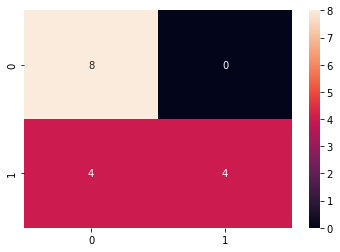

Fold 1 accuracy: 0.75


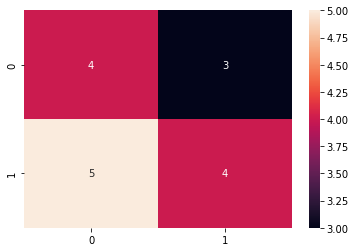

Fold 2 accuracy: 0.5


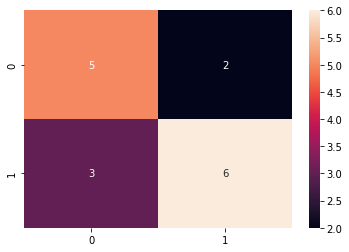

Fold 3 accuracy: 0.6875


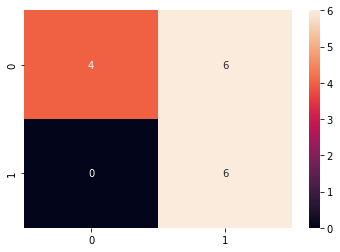

Fold 4 accuracy: 0.625


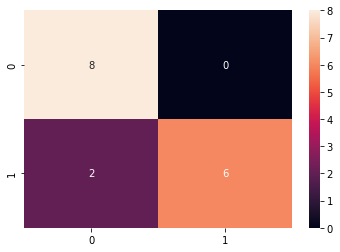

Fold 5 accuracy: 0.875
Mean accuracy: 0.6875


In [ ]:
k=5
lr = 0.001
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w1,b1,w2,b2,w3,b3,w4,b4 = initialize(22,16,8,4,1)
  w1,b1,w2,b2,w3,b3,w4,b4 = train_perceptron(train,w1,b1,w2,b2,w3,b3,w4,b4,lr)
  accuracy = evaluate_perceptron(test,w1,b1,w2,b2,w3,b3,w4,b4)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

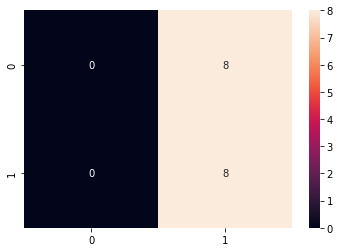

Fold 1 accuracy: 0.5


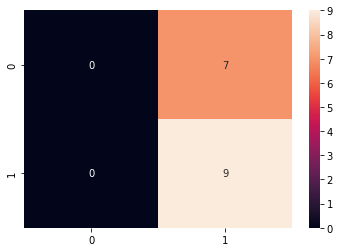

Fold 2 accuracy: 0.5625


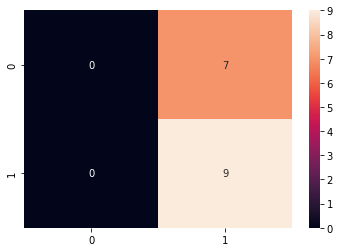

Fold 3 accuracy: 0.5625


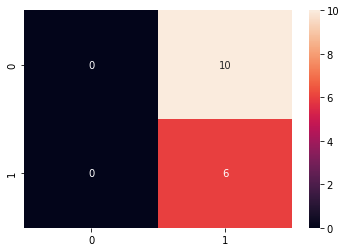

Fold 4 accuracy: 0.375


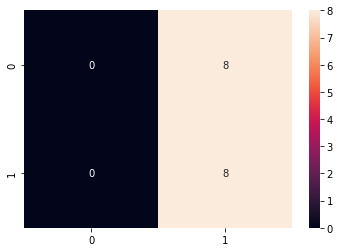

Fold 5 accuracy: 0.5
Mean accuracy: 0.5


In [ ]:
k=5
lr = 0.0001
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w1,b1,w2,b2,w3,b3,w4,b4 = initialize(22,16,8,4,1)
  w1,b1,w2,b2,w3,b3,w4,b4 = train_perceptron(train,w1,b1,w2,b2,w3,b3,w4,b4,lr)
  accuracy = evaluate_perceptron(test,w1,b1,w2,b2,w3,b3,w4,b4)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

## Part 2: IRIS dataset

In [ ]:
from sklearn.datasets import load_iris 

In [ ]:
#Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= ['sepal_length','sepal_width','petal_length','petal_width','class'])
df = df.sample(frac = 1,random_state=12).reset_index(drop=True)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.0,3.5,1.3,0.3,0.0
1,6.3,2.5,5.0,1.9,2.0
2,4.4,3.0,1.3,0.2,0.0
3,5.7,2.8,4.1,1.3,1.0
4,6.8,3.2,5.9,2.3,2.0
...,...,...,...,...,...
145,6.8,2.8,4.8,1.4,1.0
146,4.6,3.1,1.5,0.2,0.0
147,7.4,2.8,6.1,1.9,2.0
148,6.1,2.6,5.6,1.4,2.0


In [ ]:
def evaluate_perceptron_2(data,w1,b1,w2,b2,w3,b3,w4,b4):
  x = data[:,:-1]
  y = data[:,-1:]
  pred = []

  h1, h2, h3, h4, y_pred3 = predict(x,w1,b1,w2,b2,w3,b3,w4,b4)

  for i in range(len(y_pred3)):
    pred.append(y_pred3[i].argmax(axis=0))
  cm = confusion_matrix(y,pred)
  accuracy = np.sum(np.diag(cm))/np.sum(cm)
  sn.heatmap(cm,annot=True)
  plt.show()
  return accuracy

In [ ]:
def train_perceptron_2(data,w1,b1,w2,b2,w3,b3,w4,b4,lr,iterations = 2000):
  x = data[:,:-1]
  y_new = data[:,-1:]
  
  actual = []
  for i in range(len(y_new)):
    if y_new[i]==0:
      actual.append([1,0,0])
    elif y_new[i]==1:
      actual.append([0,1,0)
    elif y_new[i]==2]:
      actual.append([0,0,1])
  
  for i in range(iterations):
    hop1, hop2, hop3, hop4, output = predict(x,w1,b1,w2,b2,w3,b3,w4,b4)
    w1 = w1 - lr * np.clip(x.T @ (output-actual) @ w4.T @ w3.T @ w2.T,-1,1)
    b1 = b1 - lr * np.clip(np.sum((output-actual) @ w4.T @ w3.T @ w2.T, axis = 0),-1,1)
    w2 = w2 - lr * np.clip(hop1.T @ (output-actual) @ w4.T @ w3.T,-1,1)
    b2 = b2 - lr * np.clip(np.sum((output-actual) @ w4.T @ w3.T, axis = 0),-1,1)
    w3 = w3 - lr * np.clip(hop2.T @ (output-actual) @ w4.T,-1,1)
    b3 = b3 - lr * np.clip(np.sum((output-actual) @ w4.T, axis = 0),-1,1)
    w4 = w4 - lr * np.clip(hop3.T @ (output-actual),-1,1)
    b4 = b4 - lr * np.clip(np.sum((output-actual), axis = 0),-1,1)
    
  return w1,b1,w2,b2,w3,b3,w4,b4

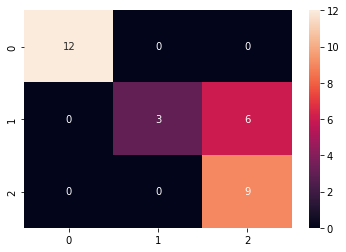

Fold 1 accuracy: 0.8


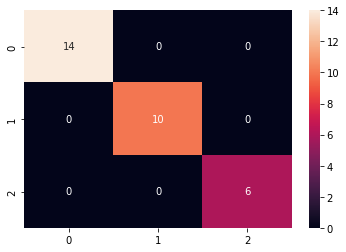

Fold 2 accuracy: 1.0


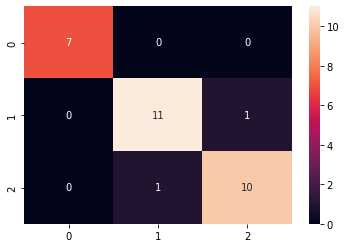

Fold 3 accuracy: 0.9333333333333333


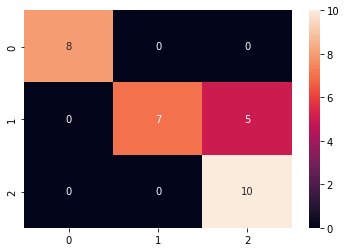

Fold 4 accuracy: 0.8333333333333334


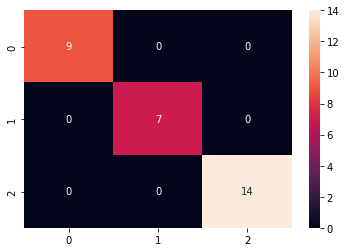

Fold 5 accuracy: 1.0
Mean accuracy: 0.9133333333333333


In [ ]:
k=5
lr = 0.01
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w1,b1,w2,b2,w3,b3,w4,b4 = initialize(4,3,3,3,3)
  w1,b1,w2,b2,w3,b3,w4,b4 = train_perceptron_2(train,w1,b1,w2,b2,w3,b3,w4,b4,lr)
  
  accuracy = evaluate_perceptron_2(test,w1,b1,w2,b2,w3,b3,w4,b4)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

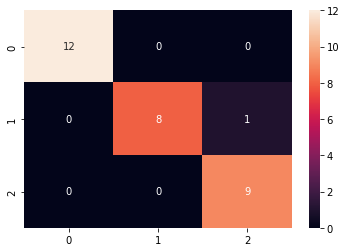

Fold 1 accuracy: 0.9666666666666667


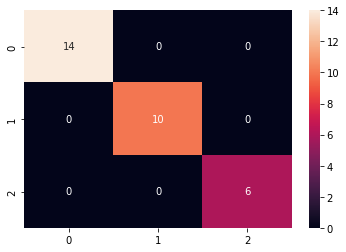

Fold 2 accuracy: 1.0


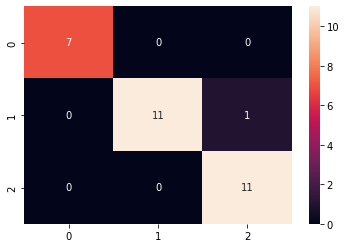

Fold 3 accuracy: 0.9666666666666667


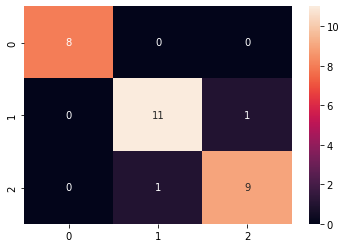

Fold 4 accuracy: 0.9333333333333333


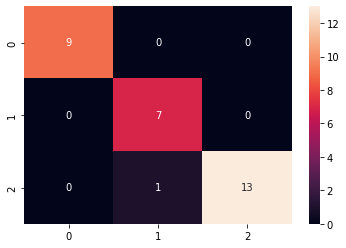

Fold 5 accuracy: 0.9666666666666667
Mean accuracy: 0.9666666666666668


In [ ]:
k=5
lr = 0.001
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w1,b1,w2,b2,w3,b3,w4,b4 = initialize(4,3,3,3,3)
  w1,b1,w2,b2,w3,b3,w4,b4 = train_perceptron_2(train,w1,b1,w2,b2,w3,b3,w4,b4,lr)
  
  accuracy = evaluate_perceptron_2(test,w1,b1,w2,b2,w3,b3,w4,b4)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

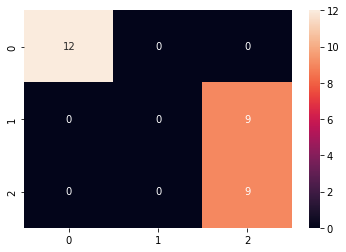

Fold 1 accuracy: 0.7


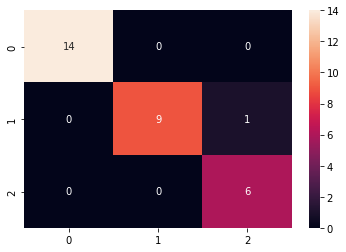

Fold 2 accuracy: 0.9666666666666667


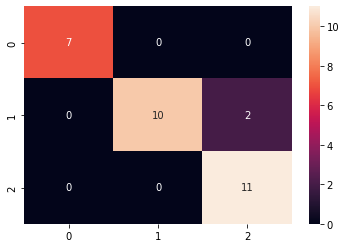

Fold 3 accuracy: 0.9333333333333333


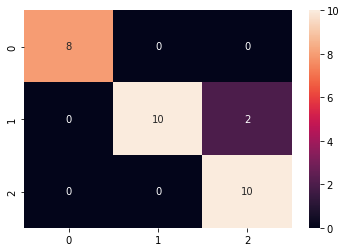

Fold 4 accuracy: 0.9333333333333333


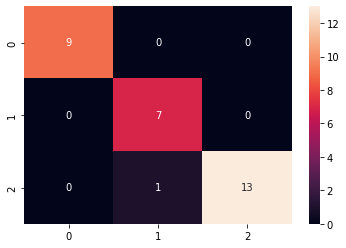

Fold 5 accuracy: 0.9666666666666667
Mean accuracy: 0.9


In [ ]:
k=5
lr = 0.0001
df_numpy = df.values
kf = KFold(n_splits=k)
accuracies = []
fold = 0

for train_idx, test_idx in kf.split(df):
  fold+=1
  train = df_numpy[train_idx]
  test = df_numpy[test_idx]
  
  w1,b1,w2,b2,w3,b3,w4,b4 = initialize(4,4,4,3,3)
  w1,b1,w2,b2,w3,b3,w4,b4 = train_perceptron_2(train,w1,b1,w2,b2,w3,b3,w4,b4,lr,7000)
  
  accuracy = evaluate_perceptron_2(test,w1,b1,w2,b2,w3,b3,w4,b4)
  print('Fold',fold,'accuracy:',accuracy)
  accuracies.append(accuracy)

print('Mean accuracy:',np.mean(accuracies))

## Analysis of learning rate:

As the learning rate decreases, the speed of convergence decreases due to which the accuracy decreases. Also the number of datapoints is less the accuracy decreases as learning rate decreases.